# Introduction:
The loan eligibility prediction project aims to automate the loan eligibility process by identifying customer segments eligible for loan amounts, based on customer details such as gender, marital status, education, income, loan amount, credit history, and others. The dataset consists of 615 rows, each consisting of 12 features and 1 dependent feature (loan status) with two classes, Y (yes eligible) or N (no not eligible). In this report, we will discuss the preprocessing techniques, analysis and visualizations, models and hyperparameters used, and other techniques applied to enhance the results.

In [99]:
import pandas as pd  
import numpy as np   
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

# Preprocessing

Before building the models, we ensured that the dataset was clean and ready-to-use by dealing with empty cells or duplicate records, converting the used categorical columns (gender, marital status, education, property area) to numerical columns using one of the encoding techniques (label encoding), applying feature scaling (normalization) for variables, and modifying data in the wrong format if found.



In [100]:
data = pd.read_csv("/content/loan_data_set.csv")

In [101]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
data.shape

(614, 13)

In [103]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [104]:
data.isnull().sum()  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [106]:
data=data.dropna() 
#to avoid introducing too much noise into the model.

In [107]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [108]:
data.isnull().sum()  

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [109]:
data.duplicated().sum()  

0

In [110]:
data["Dependents"].value_counts() 

0     316
1      96
2      96
3+     45
Name: Dependents, dtype: int64

In [111]:
data["Dependents"] = data["Dependents"].replace(to_replace="3+",value=3)

In [112]:
data["Dependents"].value_counts()

0    316
1     96
2     96
3     45
Name: Dependents, dtype: int64

# Visualizations

---



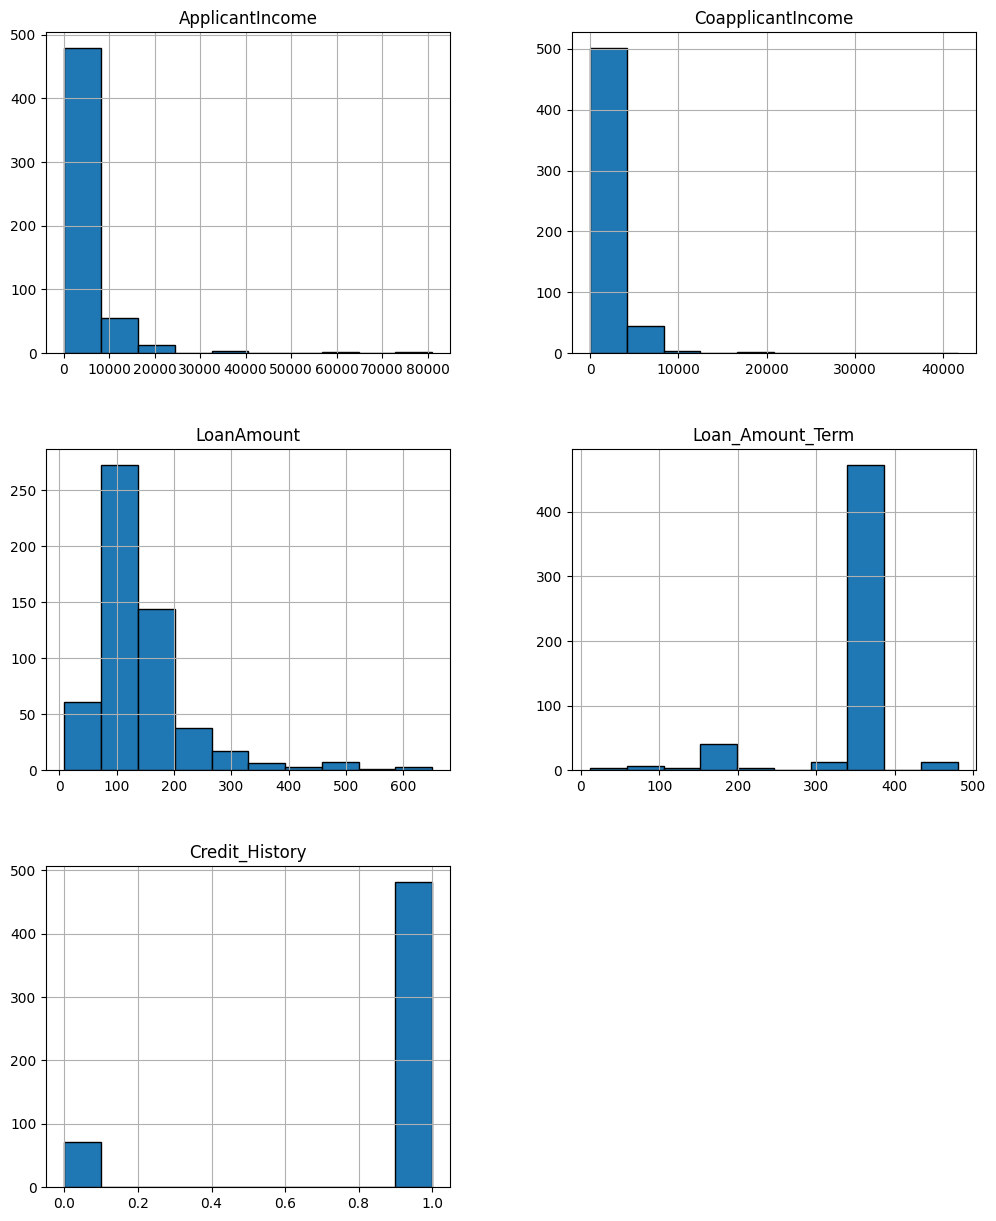

In [113]:
data.hist(figsize=(12,15),edgecolor='black');

<Axes: xlabel='Credit_History', ylabel='count'>

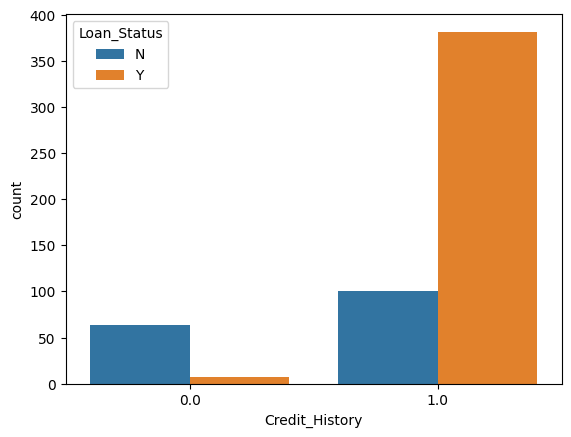

In [114]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=data)

<Axes: xlabel='Gender', ylabel='count'>

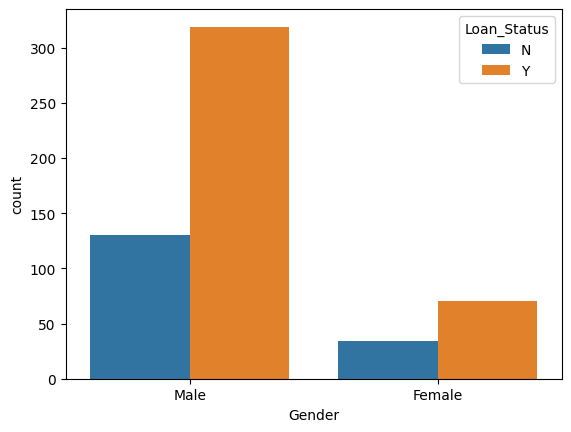

In [115]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

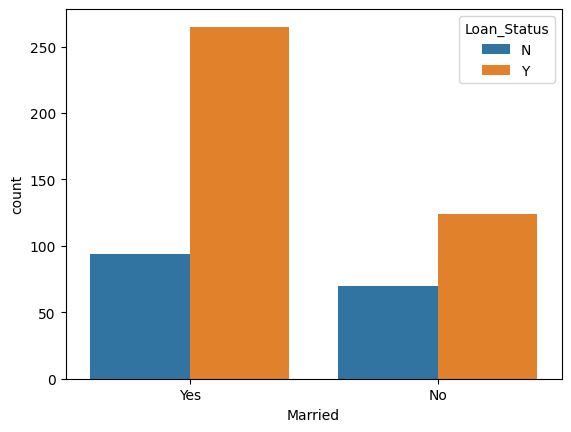

In [116]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<Axes: xlabel='Education', ylabel='count'>

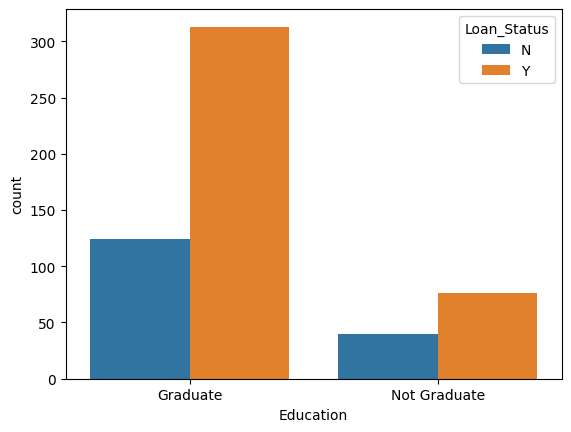

In [117]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Property_Area', ylabel='count'>

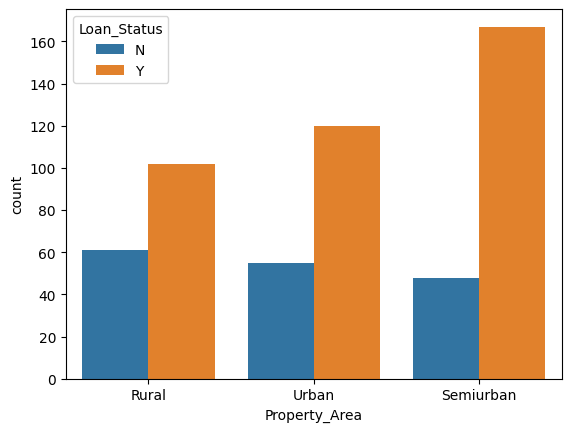

In [118]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)


<Axes: xlabel='Dependents', ylabel='count'>

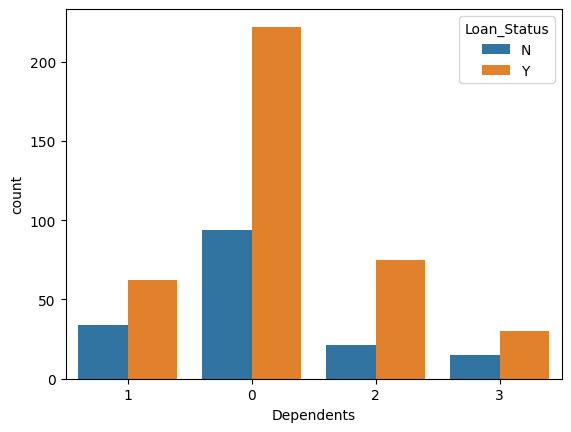

In [119]:
sns.countplot(x="Dependents",hue="Loan_Status",data=data)

<Axes: >

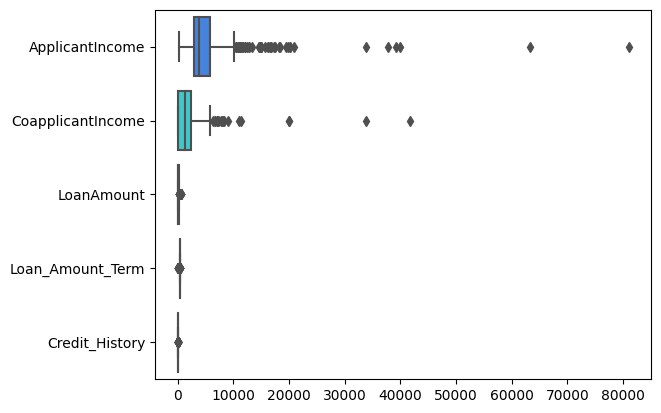

In [120]:
sns.boxplot(data=data,palette='rainbow',orient='h')
#to show outliers

# handleing outliers

In [121]:
# Define the columns to check for outliers
cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']

# Calculate the IQR for each column
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outliers with Q1 or Q3 values
for col in cols:
    data.loc[data[col] < lower_bound[col], col] = Q1[col]
    data.loc[data[col] > upper_bound[col], col] = Q3[col]


In [122]:
print(data['Loan_Amount_Term'].value_counts())


360.0    473
180.0     40
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<Axes: >

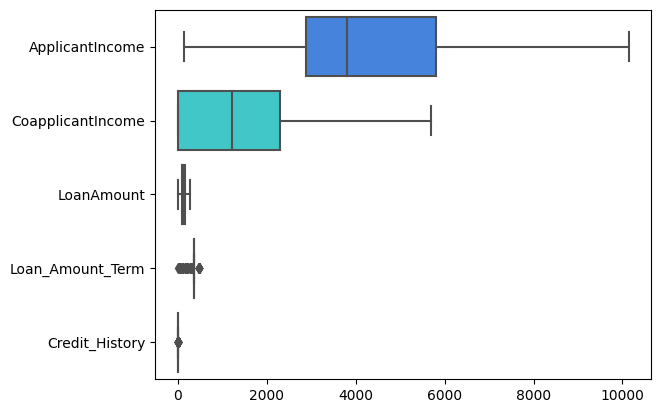

In [123]:
sns.boxplot(data=data,palette='rainbow',orient='h')
#to show outliers

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    object 
 2   Married            553 non-null    object 
 3   Dependents         553 non-null    object 
 4   Education          553 non-null    object 
 5   Self_Employed      553 non-null    object 
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     553 non-null    float64
 11  Property_Area      553 non-null    object 
 12  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


In [125]:
le = LabelEncoder()

# apply LabelEncoder to categorical columns
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Dependents'].replace({'0':0,'1':1,'2':2,'3':3}, inplace=True)

In [126]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    int64  
 2   Married            553 non-null    int64  
 3   Dependents         553 non-null    int64  
 4   Education          553 non-null    int64  
 5   Self_Employed      553 non-null    int64  
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     553 non-null    float64
 11  Property_Area      553 non-null    int64  
 12  Loan_Status        553 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 60.5+ KB


# Feature Selection and Extraction:
To visualize correlation, we plotted a correlation matrix heatmap using the Seaborn library. We observed that credit history had the highest correlation with loan status, followed by marital status.but it did not result in significant improvements in the model performance.

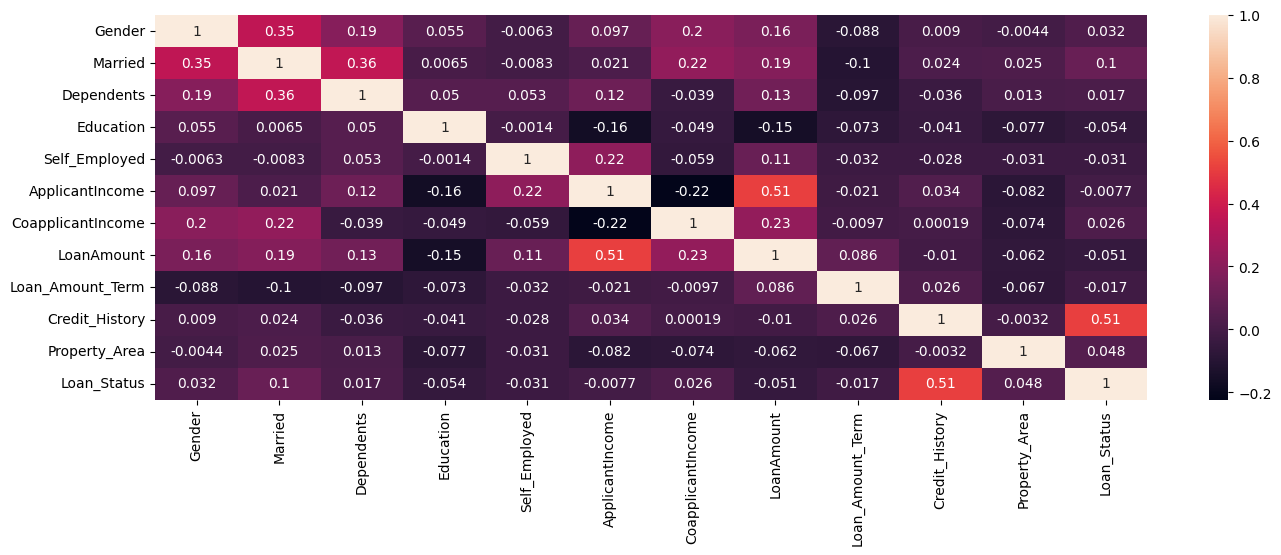

In [127]:
#Generating a correlation matrix
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [128]:
print(corr_matrix["Loan_Status"].sort_values(ascending=False))


Loan_Status          1.000000
Credit_History       0.508250
Married              0.103425
Property_Area        0.048426
Gender               0.031990
CoapplicantIncome    0.026120
Dependents           0.017472
ApplicantIncome     -0.007717
Loan_Amount_Term    -0.017117
Self_Employed       -0.031146
LoanAmount          -0.051373
Education           -0.054442
Name: Loan_Status, dtype: float64


**Credit_History** has high correlation as it provides information about the borrower's creditworthiness and ability to repay the loan.




# Feature Selection



In [129]:
X  = data.drop(columns=["Loan_ID","Loan_Status"],axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [130]:
Y = data["Loan_Status"]
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64

In [131]:
from sklearn.feature_selection import SelectKBest, chi2
# perform chi-squared feature selection
selector = SelectKBest(chi2, k=5)
X = selector.fit_transform(X, Y)

# print the selected features
print("Selected features:", selector.get_support())

Selected features: [False  True False False False  True  True  True False  True False]


In [132]:
# create a dataframe from the numpy array
X = pd.DataFrame(X, columns=['Married', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'])
X

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,1.0,4583.0,1508.0,128.0,1.0
1,1.0,3000.0,0.0,66.0,1.0
2,1.0,2583.0,2358.0,120.0,1.0
3,0.0,6000.0,0.0,141.0,1.0
4,1.0,5417.0,4196.0,267.0,1.0
...,...,...,...,...,...
548,0.0,2900.0,0.0,71.0,1.0
549,1.0,4106.0,0.0,40.0,1.0
550,1.0,8072.0,240.0,253.0,1.0
551,1.0,7583.0,0.0,187.0,1.0


In [133]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64

# Feature Scaling (Standardization)

to normalize the range of values of the input features or independent variables in a machine learning model.

This can be useful for improving the performance of many machine learning algorithms

standardize the data, by subtracting the mean of each column and dividing by its standard deviation. This ensures that each column has a mean of 0 and a standard deviation of 1.

In [134]:
cols = ['Married', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']

In [135]:
from sklearn.preprocessing import StandardScaler 
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])
X

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,0.735112,0.171008,0.127351,-0.088552,0.383801
1,0.735112,-0.665453,-0.913355,-1.346781,0.383801
2,0.735112,-0.885797,0.713956,-0.250904,0.383801
3,-1.360337,0.919755,-0.913355,0.175270,0.383801
4,0.735112,0.611696,1.982403,2.732315,0.383801
...,...,...,...,...,...
548,-1.360337,-0.718293,-0.913355,-1.245311,0.383801
549,0.735112,-0.081040,-0.913355,-1.874425,0.383801
550,0.735112,2.014605,-0.747726,2.448199,0.383801
551,0.735112,1.756216,-0.913355,1.108794,0.383801


# Model Training & Model Evaluation




We trained three models, namely Logistic Regression, SVM, and Decision Tree (ID3), using the Scikit-learn library.We split the data into 80% training and 20% testing sets.



We evaluated the models on the testing set using various evaluation metrics such as accuracy, confusion matrix, and classification report. The accuracy of the Logistic Regression model was 0.875, SVM was 0.875, and Decision Tree was 0.77 . The confusion matrix and classification report showed that Logistic Regression performed the best, with higher precision and recall scores for both classes.

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,f1_score,confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [137]:
model_df = {}
def model_val(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=0.20,  #20% test
                                                        random_state=42) #random data in this state
    model.fit(X_train, Y_train) 
    Y_pred = model.predict(X_test)
    print(f"{model} accuracy is {f1_score(Y_test, Y_pred)}")
    print(f"{model} confusion matrix is\n{confusion_matrix(Y_test, Y_pred)}")
    print(f"{model} classification report is\n{classification_report(Y_test, Y_pred)}")
    print(f"{model} mean squared error is {mean_squared_error(Y_test, Y_pred)}\n")

# Logistic Regression


In [138]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,Y)

LogisticRegression() accuracy is 0.8750000000000001
LogisticRegression() confusion matrix is
[[12 22]
 [ 0 77]]
LogisticRegression() classification report is
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        34
           1       0.78      1.00      0.88        77

    accuracy                           0.80       111
   macro avg       0.89      0.68      0.70       111
weighted avg       0.85      0.80      0.77       111

LogisticRegression() mean squared error is 0.1981981981981982



**Confusion Matrix for the Logistic Regression shows that:**

 the model correctly predicted 12 samples as not eligible and 77 samples as eligible, but incorrectly predicted 22 samples as eligible (false positives) and 0 samples as not eligible (false negatives).

**Precision is the ratio of true positives to the total predicted positives (TP / (TP + FP))**

The precision for class 0 is 1.00, which means that all the samples predicted as not eligible by the model were actually not eligible.

 The precision for class 1 is 0.78, which means that 78% of the samples predicted as eligible by the model were actually eligible.



**Recall: Recall is the ratio of true positives to the total actual positives (TP / (TP + FN)).**

 In this case, the recall for class 0 is 0.35, which means that only 35% of the actual not eligible samples were correctly identified by the model. The recall for class 1 is 1.00, which means that all the actual eligible samples were correctly identified by the model.

Logistic Regression model has a higher precision score for class 1 (eligible) than both the SVC and Decision Tree models. This means that the Logistic Regression model is better at correctly predicting eligible loan applicants.

 **Hyperparameter Tuning**  
 
 the process of selecting the best combination of hyperparameters for a machine learning model that maximizes its performance

In [139]:
log_reg_grid={"C":np.logspace(-4,4,20),# function generates a sequence of 20 numbers that are logarithmically spaced between 1e-4 and 1e4,
             "solver":['liblinear']} # 'liblinear' solver is a good choice for small datasets and binary classification problems.

In [140]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,scoring='f1',cv=5,verbose=True)
#n_iter: is the number of random combinations of hyperparameters to try.
#cv: is the number of folds to use for cross-validation during the search.
#verbose: is a flag that controls the verbosity of the output during the search.

In [141]:
rs_log_reg.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   scoring='f1', verbose=True)

In [142]:
rs_log_reg.best_score_

0.8773476965121528

In [143]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

# SVM

In [144]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,Y)

SVC() accuracy is 0.8750000000000001
SVC() confusion matrix is
[[12 22]
 [ 0 77]]
SVC() classification report is
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        34
           1       0.78      1.00      0.88        77

    accuracy                           0.80       111
   macro avg       0.89      0.68      0.70       111
weighted avg       0.85      0.80      0.77       111

SVC() mean squared error is 0.1981981981981982



 Hyperparameter Tuning

In [145]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [146]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                   scoring='f1',
                  verbose=True)

In [147]:
rs_svc.fit(X,Y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   scoring='f1', verbose=True)

In [148]:
rs_svc.best_score_

0.8773476965121528

In [149]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

# Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() accuracy is 0.767123287671233
DecisionTreeClassifier() confusion matrix is
[[21 13]
 [21 56]]
DecisionTreeClassifier() classification report is
              precision    recall  f1-score   support

           0       0.50      0.62      0.55        34
           1       0.81      0.73      0.77        77

    accuracy                           0.69       111
   macro avg       0.66      0.67      0.66       111
weighted avg       0.72      0.69      0.70       111

DecisionTreeClassifier() mean squared error is 0.3063063063063063



# Save The Model

In [151]:
log_reg =RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [152]:
log_reg.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [153]:
import joblib

In [154]:
joblib.dump(log_reg,'loan_status_predict')

['loan_status_predict']

In [155]:
model = joblib.load('loan_status_predict')

In [156]:
df = pd.DataFrame({
    'Gender':1, #Male
    'Married':1, #Yes
    'Dependents':0, #can take 0,1,2,3
    'Education':0, #Graduated
    'Self_Employed':0, #No
    'ApplicantIncome':2000,
    'CoapplicantIncome':0.0,
    'LoanAmount':100, #in thousands 100,000$
    'Loan_Amount_Term':80, #in months
    'Credit_History':0, #No
    'Property_Area':1 #Rural=0 , SemiUrban=1 , Urban=2
},index=[0])

In [157]:
df = pd.DataFrame(df, columns=['Married', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'])

In [158]:
result = model.predict(df)

In [161]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


# GUI by Tkinter

In [ ]:
import tkinter as tk
from tkinter import ttk
import joblib
import pandas as pd

def toggle_mode():
    if mode_switch.instate(["selected"]):
        style.theme_use("forest-light")
    else:
        style.theme_use("forest-dark")

def validate_fields(*args):
    if (Genger_combobox.get() != "" and Married_variable.get() != "" and Dependents_spinbox.get() != "Number of dependents"
            and Education_combobox.get() != "" and Self_Employed_variable.get() != "" and ApplicantIncome_entry.get() != "Applicant_Income"
            and CoapplicantIncome_entry.get() != "CoapplicantIncome" and LoanAmount_entry.get() != "LoanAmount"
            and Loan_Amount_Term_entry.get() != "Loan_Amount_Term" and Credit_History_variable.get() != ""
            and Property_Area_combobox.get() != ""):
        button.config(state="normal")
    else:
        button.config(state="disabled")
def prediction():
    gender = 0 if "Female" else 1
    married = 1 if Married_variable.get() else 0
    dependents = Dependents_spinbox.get()
    if dependents == "Number of dependents":
        print("Falied")
    else:
        dependents = int(dependents)
    education = 0 if "Graduate" else 1
    self_employed = 1 if Self_Employed_variable.get() else 0
    applicant_income = float(ApplicantIncome_entry.get())
    coapplicant_income = float(CoapplicantIncome_entry.get())
    loan_amount = float(LoanAmount_entry.get())
    loan_amount_term = float(Loan_Amount_Term_entry.get())
    credit_history = 1 if Credit_History_variable.get() else 0
    property_area = 0 if Property_Area_combobox.get() == "Rural" else 1 if Property_Area_combobox.get() == "Semiurban" else 2

    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
        'Gender': gender,
        'Married': married,
        'Dependents': dependents,
        'Education': education,
        'Self_Employed': self_employed,
        'ApplicantIncome': applicant_income,
        'CoapplicantIncome': coapplicant_income,
        'LoanAmount': loan_amount,
        'Loan_Amount_Term': loan_amount_term,
        'Credit_History': credit_history,
        'Property_Area': property_area
    }, index=[0])
    df = pd.DataFrame(df, columns=['Married', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'])
    result = model.predict(df)

    if result == 1:
        prediction_label.configure(text="Loan approved")
    else:
        prediction_label.configure(text="Loan Not Approved")

root = tk.Tk()
style = ttk.Style(root)

root.tk.call("source", "forest-light.tcl")
root.tk.call("source", "forest-dark.tcl")
style.theme_use("forest-dark")


Genger_combobox_list=["Female","Male"]
Education_combobox_list=["Graduate","Not Graduate"]
Property_Area_combobox_list=["Rural","Semiurban","Urban"]
frame = ttk.Frame(root)
frame.pack()
widget_frame=ttk.LabelFrame(frame,text="Insert Data")
widget_frame.grid(row=0, column=0, padx=40, pady=40)

Gender_variable=tk.Variable
Genger_combobox=ttk.Combobox(widget_frame,values=Genger_combobox_list,textvariable=Gender_variable)
Genger_combobox.grid(row=0,column=0, padx=8, pady=8,sticky="ew")
Genger_combobox.current(0)

Married_variable=tk.BooleanVar()
Married_chechbutton=ttk.Checkbutton(widget_frame,text="Married",variable=Married_variable)
Married_chechbutton.grid(row= 1, column=0 ,padx=8, pady=8, sticky="nsew")#expanded in north-south-...all directions

Dependents_spinbox=ttk.Spinbox(widget_frame,from_=0,to=3)
Dependents_spinbox.grid(row=2 , column=0 ,padx=8,pady=8, sticky="ew")
Dependents_spinbox.insert(0,"Number of dependents") #to make placeholder


Education_variable=tk.Variable
Education_combobox=ttk.Combobox(widget_frame,values=Education_combobox_list,textvariable=Education_variable)
Education_combobox.grid(row=3,column=0,padx=8, pady=8,sticky="ew")
Education_combobox.current(0)

Self_Employed_variable=tk.BooleanVar()
Self_Employed_chechbutton=ttk.Checkbutton(widget_frame,text="Self_Employed",variable=Self_Employed_variable)
Self_Employed_chechbutton.grid(row=4 , column=0 ,padx=5,pady=(0,5), sticky="nsew")


ApplicantIncome_entry=ttk.Entry(widget_frame)
ApplicantIncome_entry.insert(5,"Applicant_Income") #to make placeholder
ApplicantIncome_entry.bind("<FocusIn>",lambda e:ApplicantIncome_entry.delete('0','end')) #to clear placeholder on focusIn
ApplicantIncome_entry.grid(padx=8, pady=8,sticky="ew")

CoapplicantIncome_entry=ttk.Entry(widget_frame)
CoapplicantIncome_entry.insert(6,"CoapplicantIncome") #to make placeholder
CoapplicantIncome_entry.bind("<FocusIn>",lambda e:CoapplicantIncome_entry.delete('0','end')) #to clear placeholder on focusIn
CoapplicantIncome_entry.grid(padx=8, pady=8,sticky="ew")

LoanAmount_entry=ttk.Entry(widget_frame)
LoanAmount_entry.insert(7,"LoanAmount(thousands)") #to make placeholder
LoanAmount_entry.bind("<FocusIn>",lambda e:LoanAmount_entry.delete('0','end')) #to clear placeholder on focusIn
LoanAmount_entry.grid(padx=8, pady=8,sticky="ew")


Loan_Amount_Term_entry=ttk.Entry(widget_frame)
Loan_Amount_Term_entry.insert(8,"Loan_Amount_Term") #to make placeholder
Loan_Amount_Term_entry.bind("<FocusIn>",lambda e:Loan_Amount_Term_entry.delete('0','end')) #to clear placeholder on focusIn
Loan_Amount_Term_entry.grid(padx=8, pady=8,sticky="ew")

Credit_History_variable=tk.BooleanVar()
Credit_History_chechbutton=ttk.Checkbutton(widget_frame,text="Credit_History",variable=Credit_History_variable)
Credit_History_chechbutton.grid(padx=8, pady=8,row=9 , column=0 , sticky="nsew")

Property_Area_variable=tk.Variable
Property_Area_combobox=ttk.Combobox(widget_frame,values=Property_Area_combobox_list,textvariable=Property_Area_variable)
Property_Area_combobox.grid(padx=8, pady=8,row=10,column=0,sticky="ew")
Property_Area_combobox.current(0)

Genger_combobox.bind("<FocusOut>", validate_fields)
Married_chechbutton.bind("<FocusOut>", validate_fields)
Dependents_spinbox.bind("<FocusOut>", validate_fields)
Education_combobox.bind("<FocusOut>", validate_fields)
Self_Employed_chechbutton.bind("<FocusOut>", validate_fields)
ApplicantIncome_entry.bind("<FocusOut>", validate_fields)
CoapplicantIncome_entry.bind("<FocusOut>", validate_fields)
LoanAmount_entry.bind("<FocusOut>", validate_fields)
Loan_Amount_Term_entry.bind("<FocusOut>", validate_fields)
Credit_History_chechbutton.bind("<FocusOut>", validate_fields)
Property_Area_combobox.bind("<FocusOut>", validate_fields)


button=ttk.Button(widget_frame,text="Predict",command=prediction,state="disabled")
button.grid(padx=8, pady=8,row=11,column=0,sticky="ew")

separator=ttk.Separator(widget_frame)
separator.grid(padx=20,pady=10,row=12,column=0,sticky="ew")

mode_switch=ttk.Checkbutton( widget_frame,text="Mode",style="Switch",command=toggle_mode)
mode_switch.grid(padx=5,pady=5,row=13,column=0,sticky="nsew")

predictionFrame=ttk.LabelFrame(frame,text="Prediction")
predictionFrame.grid(row=0,column=1,pady=10)

prediction_label = ttk.Label(predictionFrame, text="Prediction will appear here",padding=10)
prediction_label.grid(row=1, column=1, sticky="w")

root.mainloop()

# Conclusion:
In conclusion, we applied preprocessing techniques such as dealing with missing values, encoding categorical variables, and feature scaling. We also performed analysis and visualizations to understand the correlation between features. We trained three models, Logistic Regression, SVM, and Decision Tree, evaluated them on various metrics, and found that Logistic Regression performed the best with the highest accuracy and better precision and recall scores. Overall, the project achieved the intended goal of automating the loan eligibility process based on customer details.